In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Churn_Modelling.csv")

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.iloc[:,2:len(df)].describe([0.01,0.1,0.25,0.5,0.75,0.99]).T

,count,mean,std,min,1%,10%,25%,50%,75%,99%,max
CreditScore,10000.0,650.528800,96.653299,350.00,432.0000,521.00,584.00,652.000,718.0000,850.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,21.0000,27.00,32.00,37.000,44.0000,72.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,0.0000,1.00,3.00,5.000,7.0000,10.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.0000,0.00,0.00,97198.540,127644.2400,185967.9854,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.0000,1.00,1.00,1.000,2.0000,3.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.0000,0.00,0.00,1.000,1.0000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.0000,0.00,0.00,1.000,1.0000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,1842.8253,20273.58,51002.11,100193.915,149388.2475,198069.7345,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.0000,0.00,0.00,0.000,0.0000,1.0000,1.00


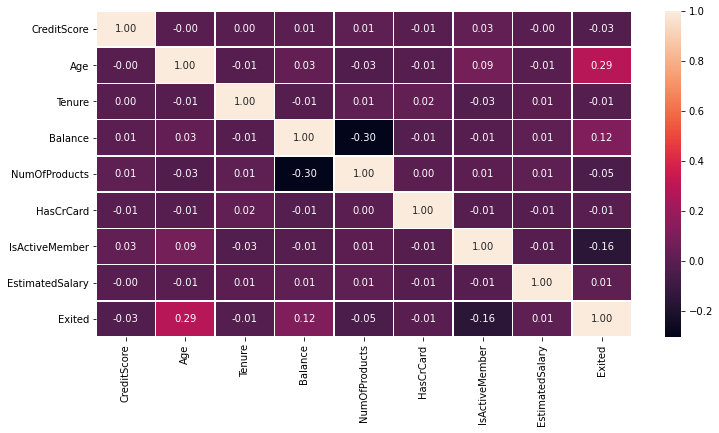

In [6]:
# Visualization of corelation of variables
fig, ax = plt.subplots(figsize=(12,6)) 
sns.heatmap(df.loc[:,'Surname':'Exited'].corr(), annot = True, fmt = ".2f", linewidths=0.5, ax=ax) 
plt.show()

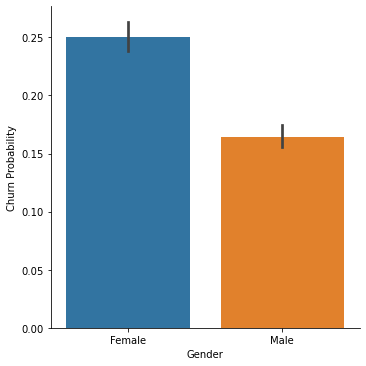

In [7]:
g= sns.factorplot(x = "Gender", y = "Exited", data = df, kind = "bar", size = 5)
g.set_ylabels("Churn Probability")
plt.show()

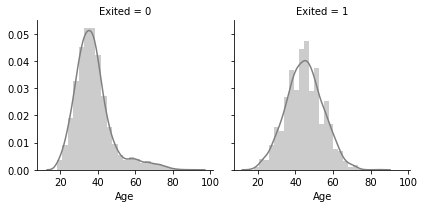

In [8]:
d = {'color': ['grey']}
g= sns.FacetGrid(df, col = "Exited",hue_kws=d)
g.map(sns.distplot, "Age", bins = 25)
plt.show()

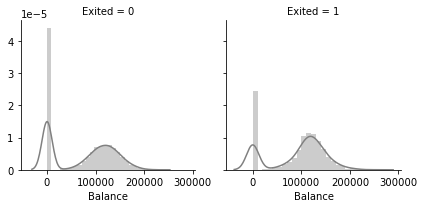

In [9]:
g= sns.FacetGrid(df, col = "Exited",hue_kws=d)
g.map(sns.distplot, "Balance", bins = 25)
plt.show()

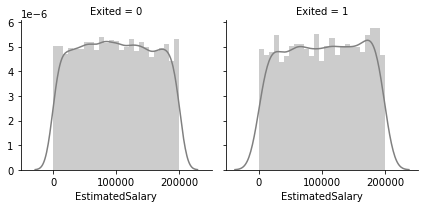

In [10]:
g= sns.FacetGrid(df, col = "Exited",hue_kws=d)
g.map(sns.distplot, "EstimatedSalary", bins = 25)
plt.show()

In [11]:
##
xs = df.drop(['RowNumber','CustomerId','Surname'], axis=1)
xs.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
for i in range(10000):
    if xs['Gender'][i]=="Female":
        xs['Gender'][i]=1
    else:
        xs['Gender'][i]=0

In [13]:
data=[0]*10000

In [14]:
ger=pd.DataFrame(data,columns=['Germany'])
fran=pd.DataFrame(data,columns=['France'])
spain=pd.DataFrame(data,columns=['Spain'])
spain.shape

(10000, 1)

In [15]:
xs.reset_index(drop=True, inplace=True,)
fran.reset_index(drop=True, inplace=True,)
spain.reset_index(drop=True, inplace=True,)
ger.reset_index(drop=True, inplace=True,)
new=pd.concat([xs,ger,fran,spain],axis=1,sort=False)

In [16]:
for i in range(10000):
    new['Germany'][i]=0
    new['Spain'][i]=0
    new['France'][i]=0

In [17]:
new.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,France,Spain
0,619,France,1,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,Spain,1,41,1,83807.86,1,0,1,112542.58,0,0,0,0
2,502,France,1,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,France,1,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,Spain,1,43,2,125510.82,1,1,1,79084.10,0,0,0,0


In [18]:
for x in range(10000):
    if xs['Geography'][x]=="Germany":
        new['Germany'][x]=1
    elif new['Geography'][x]=="France": 
        new['France'][x]=1
    elif new['Geography'][x]=="Spain": 
        new['Spain'][x]=1

In [19]:
xs = new.drop(['Geography'], axis=1)

In [20]:
xs.to_csv(r'/Users/ihjas/Desktop/Churn.csv',index=False)